In [2]:
#load the saved model

In [3]:
import tensorflow.lite as tflite

2025-02-02 16:00:47.018044: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-02 16:00:47.044399: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
interpreter =tflite.Interpreter(model_path="mri.model.tflite")
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
input_index=interpreter.get_input_details()[0]['index']
output_index=interpreter.get_output_details()[0]['index']
print(input_index,  output_index)

0 488


In [6]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 488,
  'shape': array([1, 4], dtype=int32),
  'shape_signature': array([-1,  4], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [7]:
import numpy as np 

In [55]:
import requests
from io import BytesIO
from PIL import Image
url = "https://github.com/adel-dabah/ml_capstone2/blob/main/dataset/Testing/pituitary/Te-piTr_0003.jpg?raw=true"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.resize((300, 300))
x = np.array(img)

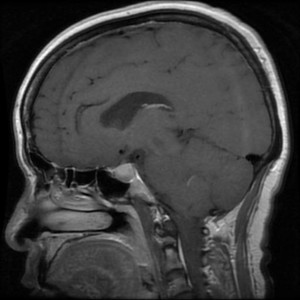

In [56]:
img

In [57]:
X=np.array([x])

In [58]:
#X=preprocess_input(X)
interpreter.set_tensor(input_index, X.astype(np.float32))

In [59]:
#run the inference
interpreter.invoke()

In [60]:
#get the output tensor
pred_x=interpreter.get_tensor(output_index)

In [61]:
class_indices={'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [62]:
pred=dict(zip(list(class_indices.keys()), list(pred_x[0])))

In [ ]:
print(pred)

{'glioma': -3.862265,
 'meningioma': -0.60169756,
 'notumor': -3.8679793,
 'pituitary': 5.46329}